In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [1]:
library(raster)
library(gdalUtils)

Loading required package: sp


In [3]:
# get all the rasters aso tiles
#list files in a specific folder
veg_aso <- list.files(path = "~/dem/")

In [4]:
asos <- list()
preds <-list()
for (vaso in veg_aso)
{
    #print(vaso)
    recur = list.files(path=paste("~/dem/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos <- append(asos,paste("~/dem/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds <- append(preds,paste("~/dem/",vaso,"/",filename,sep=""))    
        }
}

print(asos) 
print(preds)        
    

[[1]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[2]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[3]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[4]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[5]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181110_1025_3B_AnalyticMS_SR_clip/m

In [11]:
str(asos)

List of 12
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:201805"| __truncated__
 $ : chr "~/dem/planet-

In [5]:
aso_un <- unlist(asos)
pred_un <- unlist(preds)

In [6]:
aso_un_list <- paste(aso_un, collapse=' ' )
pred_un_list <- paste(pred_un, collapse=' ' )

In [7]:
system("mkdir aso_dem")

In [8]:
system("mkdir aso_dem_pred")

In [9]:
file.copy(from=pred_un, to='./aso_dem_pred', 
          overwrite = TRUE, recursive = FALSE, 
          copy.mode = TRUE)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [10]:
for(i in 1:length(aso_un))
    {
     print(aso_un[i])
    file.copy(from=aso_un[i],to=paste('./aso_dem/',i,'-ASO_3M_SD_USCATE_20180528_binary_merged.tif',sep=""))
}

[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_bina

In [3]:
fo <- list.files(path = "./aso_dem", pattern = ".tif$", full.names = TRUE)
rlo <- lapply(fo, raster)

aso_dem <- do.call(merge, c(rlo, tolerance = 1))

In [4]:
f <- list.files(path = "./aso_dem_pred", pattern = ".tif$", full.names = TRUE)
rl <- lapply(f, raster)

aso_dem_pred <- do.call(merge, c(rl, tolerance = 1))


In [18]:
aso_dem

class       : RasterLayer 
dimensions  : 26547, 32768, 869892096  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8938, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpfiPeyr/raster/r_tmp_2020-04-09_172447_5901_16154.grd 
names       : layer 
values      : 0, 1  (min, max)


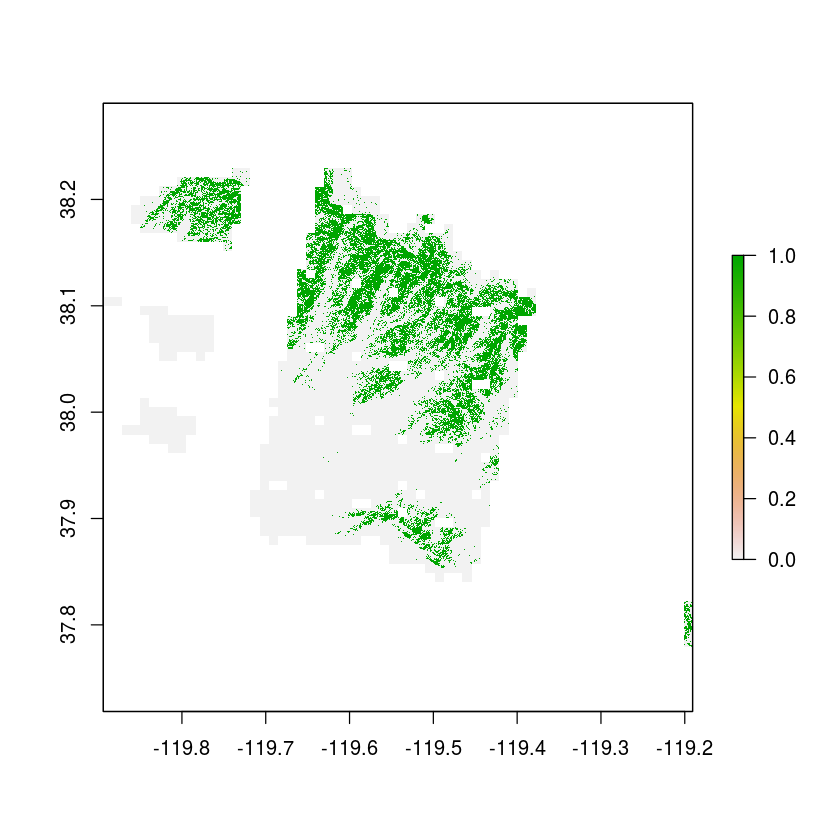

In [20]:
plot(aso_dem)

In [19]:
aso_dem_pred

class       : RasterLayer 
dimensions  : 26557, 32768, 870219776  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695065e-05  (x, y)
extent      : -119.8938, -119.1907, 37.7794, 38.22956  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpfiPeyr/raster/r_tmp_2020-04-09_172906_5901_37796.grd 
names       : layer 
values      : 0, 1  (min, max)


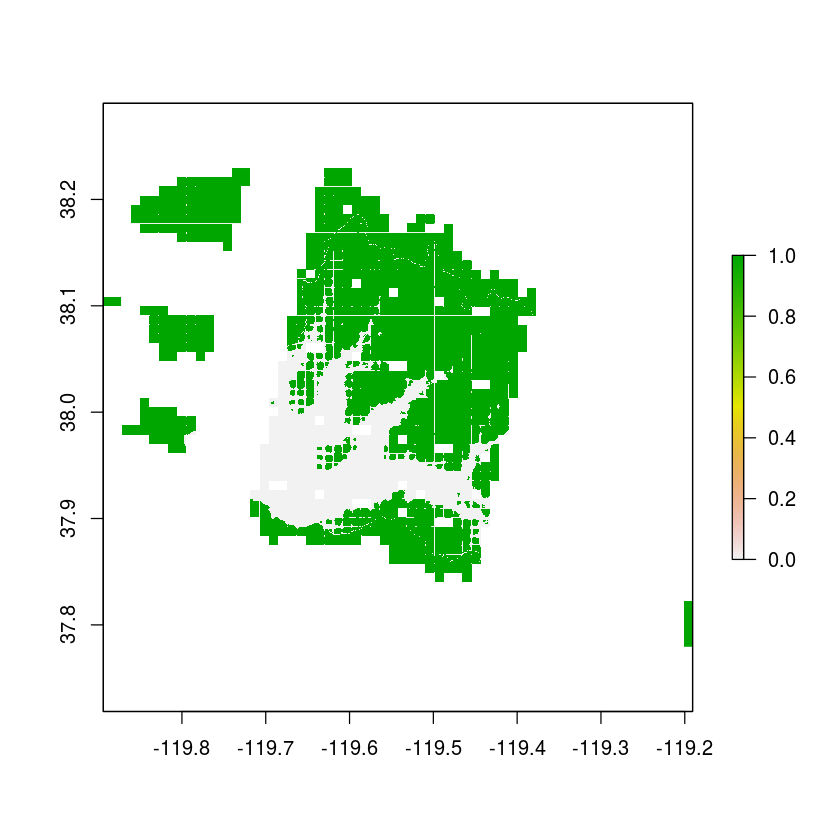

In [21]:
plot(aso_dem_pred)

In [ ]:
str(df)

In [22]:
aso_dem_pred_match_aso <- projectRaster(aso_dem_pred,aso_dem)

In [23]:
df <- stack(aso_dem,aso_dem_pred_match_aso)

In [10]:
veg_vegResamp <- raster("veg_reasampl2point1by1point6.tif")


In [24]:
veg_crop<-crop(veg_vegResamp,extent(df))

In [ ]:
writeRaster(veg_crop, filename="aso_dem_ch_test_only.tif", format="GTiff", overwrite=TRUE)

In [ ]:
#data_matrix <- rasterToPoints(df)
#head(data_matrix)
#datafra_comb <- data_matrix %>% as.data.frame()

In [7]:
# save the inter,ediate raster
writeRaster(aso_dem, filename="aso_dem_test_only.tif", format="GTiff", overwrite=TRUE)



In [8]:
writeRaster(aso_dem_pred, filename="aso_dem_pred_test_only.tif", format="GTiff", overwrite=TRUE)

In [25]:
# mask all the pixels below 2
veg_crop_h <- veg_crop
veg_crop_h[veg_crop_h < 2] <- NA
aso_demabove2 <- mask(aso_dem, veg_crop_h, filename="aso_demabove2_test.tif",overwrite=TRUE)

In [28]:
aso_dem_predabove2 <- mask(aso_dem_pred_match_aso, veg_crop_h,filename="pred_demabove2_test.tif",overwrite=TRUE)

In [2]:
aso_dem_predabove2 <- raster("pred_demabove2_test.tif")

In [3]:
aso_demabove2 <- raster("aso_demabove2_test.tif")

In [4]:
vals_pred <- getValues(aso_dem_predabove2)

In [5]:
vals_aso <- getValues(aso_demabove2)

In [ ]:
high_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

Warning message in levels(reference) != levels(data):
“longer object length is not a multiple of shorter object length”Warning message in confusionMatrix.default(vals_aso, vals_pred, mode = "prec_recall"):
“Levels are not in the same order for reference and data. Refactoring data to match.”

In [ ]:
high_veg_perf

In [ ]:
library(caret)